In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dframe = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dframe.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
X = dframe.iloc[:,1:2].values

In [5]:
X.shape

(1258, 1)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler(feature_range=(0,1))

In [8]:
X_scaled = sc.fit_transform(X)

In [9]:
X_train = list()
y_train = list()

In [10]:
for i in range(60, X.shape[0]):
    X_train.append(X_scaled[i-60:i,0])
    y_train.append(X_scaled[i,0])

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(1198, 60)

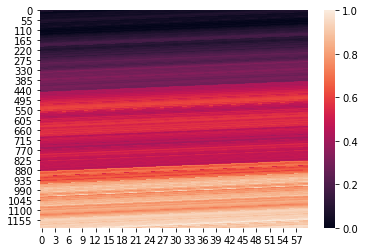

In [13]:
sns.heatmap(X_train)

In [14]:
y_train.shape

(1198,)

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
X_train.shape

(1198, 60, 1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

/Users/tari/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
regressor = Sequential()

In [19]:
#1st Layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [20]:
#2nd Layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [21]:
#3rd Layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [22]:
#4th Layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

In [23]:
regressor.add(Dense(units=1))

In [24]:
#Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
#Fitting the RNN to training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0427
Epoch 2/100
1198/1198 [==============================] - 32s 27ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 32s 27ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - 35s 29ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 32s 26ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0039
Epoch 9/100
1198/1198 [==============================] - 32s 27ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 32s 27ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 30s 25ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 32s 26ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 32s 27ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 33s 28ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0015


In [47]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [48]:
print(dframe['Open'].shape, dataset_test['Open'].shape)

(1258,) (20,)


In [49]:
#Getting the predicted stock price
dataset_total = pd.concat((dframe['Open'], dataset_test['Open']), axis=0)

In [50]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [51]:
inputs = inputs.reshape(-1,1)

In [52]:
inputs = sc.transform(inputs)

In [53]:
X_test = list()
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

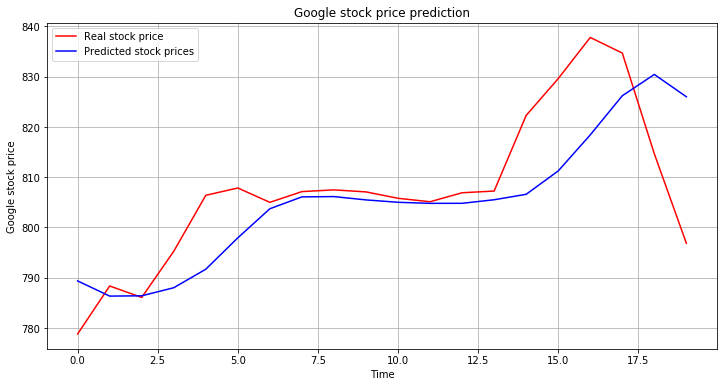

In [57]:
#Visualizing the result
plt.figure(figsize=(12,6))
plt.plot(real_stock_price, color='red', label = 'Real stock price')
plt.plot(predicted_stock_price, color = 'blue', label= 'Predicted stock prices')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.grid()